In [1]:
#Imports, set cuda device, configure tensor board

import torch
from datasets import DepthDataset
from torchvision.transforms import v2, InterpolationMode
from modules.depth_estimation_model import DepthEstimiationModel
from modules.geometry_filter import GeometryFilter
from modules.identity import Identity
from torch import nn
import trainer
import util

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

from torch.utils.tensorboard import SummaryWriter
import os
import shutil


TBOARD_LOGS = os.path.join(os.getcwd(), "tboard_logs", "vanilla_dae")
if not os.path.exists(TBOARD_LOGS):
    os.makedirs(TBOARD_LOGS)
shutil.rmtree(TBOARD_LOGS)
writer = SummaryWriter(TBOARD_LOGS)

cuda


In [2]:
root_dir = "/home/nfs/inf6/data/datasets/Carla_Moritz/SyncAngel3/"

transforms = v2.Compose([
    v2.Resize((256, 512), InterpolationMode.BILINEAR, antialias=False),
    v2.ToDtype(torch.float, scale=True),
])
depth_transforms = v2.Compose([
    v2.Resize((256, 512), InterpolationMode.BILINEAR, antialias=False),
])


train_dataset = DepthDataset(root_dir, transform=transforms, depth_transform=depth_transforms, split='train')
#test_dataset = CarlaDataset(root_dir, transform=transforms, split='test')
valid_dataset = DepthDataset(root_dir, transform=transforms, depth_transform=depth_transforms, split='validation')


train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=8)
#test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=8, shuffle=True, num_workers=4)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=4, shuffle=True, num_workers=8)


geometry_filter = GeometryFilter()
filter = Identity()
model = DepthEstimiationModel(filter=filter, freeze_backbone=False)
#model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet50', pretrained=True)
model.to(device)
model.eval()


DepthEstimiationModel(
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequent

In [3]:
a, b = next(iter(train_loader))

In [4]:
a[0,0] / 10

tensor([[0.0412, 0.0404, 0.0416,  ..., 0.0161, 0.0157, 0.0165],
        [0.0451, 0.0431, 0.0408,  ..., 0.0165, 0.0165, 0.0165],
        [0.0498, 0.0506, 0.0467,  ..., 0.0169, 0.0165, 0.0165],
        ...,
        [0.0506, 0.0502, 0.0506,  ..., 0.0498, 0.0498, 0.0494],
        [0.0506, 0.0506, 0.0502,  ..., 0.0506, 0.0490, 0.0486],
        [0.0502, 0.0502, 0.0490,  ..., 0.0518, 0.0494, 0.0475]])

In [5]:
b.shape

torch.Size([4, 1, 256, 512])

In [6]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode="min", factor=0.1, patience=10)
savepath = 'models/checkpoint_epoch_1.pth'
model, optimizer, epoch, stats = util.load_model(model, optimizer, savepath)


image, target = next(iter(train_loader))
image = image.to(device)
out = model(image)
out.shape

torch.Size([4, 1, 256, 512])

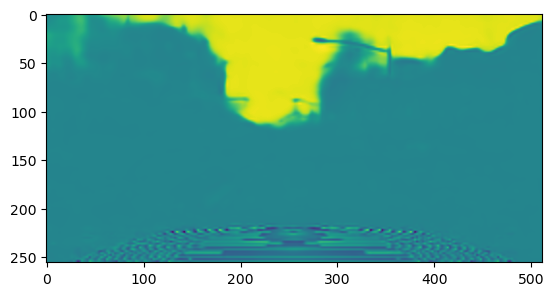

: 

In [15]:

import matplotlib.pyplot as plt
with torch.no_grad():
    plt.imshow(out[0].cpu().squeeze())

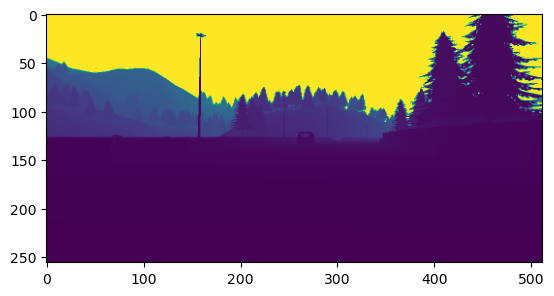

In [4]:
util.draw_image_tensor(b[0])

In [13]:
b[0].shape

torch.Size([1, 256, 512])

In [ ]:
util.draw_image_tensor(target[0])

In [1]:
import torch

In [ ]:
import math

In [7]:
x = torch.zeros((2, 2)).requires_grad_()
y = x*2
y.backward()
print(y.grad)

RuntimeError: grad can be implicitly created only for scalar outputs

In [20]:
x = torch.zeros((2, 2)).requires_grad_()
tensor_0 = torch.zeros(1)

for i in range(3):
    y = torch.stack([math.sin(x[0,0]), tensor_0],[tensor_0, tensor_0])
    y = y[0,0]
    #y = (torch.sin(x))[0,0]
    y.backward()
    print(f"Gradients at iteration {i+1}:")
    print(f"{x.grad}\n")
    x.grad.zero_()

TypeError: expected Tensor as element 0 in argument 0, but got float

In [21]:
x.split(1)

(tensor([[0., 0.]], grad_fn=<SplitBackward0>),
 tensor([[0., 0.]], grad_fn=<SplitBackward0>))

In [32]:
a = torch.as_tensor([[1, 2, 3], [4,5,6], [7,8,9]])

In [33]:
b = torch.as_tensor([[1], [2], [3]])

In [34]:
a.shape, b.shape

(torch.Size([3, 3]), torch.Size([3, 1]))

In [36]:
torch.cat([a,b], 1)

tensor([[1, 2, 3, 1],
        [4, 5, 6, 2],
        [7, 8, 9, 3]])

In [4]:
import torch

In [6]:
import pickle

meta_path = "/home/nfs/inf6/data/datasets/Carla_Moritz/SyncAngel3//Town01/seq_0000/meta.pkl"
with open(meta_path, 'rb') as f:
    metadata = pickle.load(f)

torch.as_tensor(metadata['extrinsics'][0])
        

tensor([[ 9.9997e-01,  5.7592e-03, -4.2148e-03,  2.9594e+02],
        [-5.7657e-03,  9.9998e-01, -1.5331e-03,  1.3356e+02],
        [ 4.2059e-03,  1.5574e-03,  9.9999e-01,  1.3941e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]])

In [16]:
b = torch.zeros(3,4,4)

In [14]:
a = torch.as_tensor([[1,2,3,4], [5,6,7,8], [9,0,1,2]])

In [11]:
torch.t(a)

tensor([1, 2, 3, 4])

In [18]:
a.shape, b.shape

(torch.Size([3, 4]), torch.Size([3, 4, 4]))

In [24]:
torch.cat((b,torch.unsqueeze(a, 1)), 1)

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [1., 2., 3., 4.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [5., 6., 7., 8.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [9., 0., 1., 2.]]])

In [22]:
torch.unsqueeze(a, 1).shape

torch.Size([3, 1, 4])

In [34]:
tensor_0 = torch.zeros(8)
tensor_1 = torch.ones(8)

In [26]:
tensor_0.shape

torch.Size([8])

In [35]:
torch.unsqueeze(torch.stack([tensor_0, tensor_0, tensor_0, tensor_1]), 1).reshape(8,4)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [38]:
c = torch.stack((torch.stack([tensor_1, tensor_0, tensor_0]), torch.stack([tensor_0, tensor_1, tensor_0]), torch.stack([tensor_0, tensor_0, tensor_1])))

In [42]:
d = c.permute(2,0,1)

In [40]:
c.shape

torch.Size([3, 3, 8])

In [44]:
torch.cat([d, torch.unsqueeze(torch.stack([tensor_1, tensor_1, tensor_1]), 1)], 1)

tensor([[[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.],
         [1., 1., 1.]],

        [[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.],
         [1., 1., 1.]],

        [[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.],
         [1., 1., 1.]],

        [[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.],
         [1., 1., 1.]],

        [[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.],
         [1., 1., 1.]],

        [[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.],
         [1., 1., 1.]],

        [[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.],
         [1., 1., 1.]],

        [[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.],
         [1., 1., 1.]]])

In [45]:
torch.stack([tensor_1, tensor_1, tensor_1]).shape

torch.Size([3, 8])

In [2]:
import torch
checkpoint = torch.load('./models/checkpoint_epoch_10.pth')
checkpoint['model_state_dict']

OrderedDict([('backbone.conv1.weight',
              tensor([[[[ 9.8218e-03, -1.1797e-02, -5.2835e-02,  ..., -5.6246e-02,
                         -3.5304e-02, -5.7299e-02],
                        [ 2.5409e-02,  7.0381e-03,  4.8428e-03,  ..., -2.9255e-02,
                         -2.2189e-02, -2.5361e-02],
                        [ 4.5924e-02,  7.0104e-02,  7.4323e-02,  ...,  9.7651e-02,
                          9.2022e-02,  8.9098e-02],
                        ...,
                        [-2.7748e-03,  1.9398e-02, -4.2591e-02,  ..., -1.2139e-01,
                         -8.7565e-02, -2.1138e-02],
                        [-2.4282e-02,  2.8678e-02,  5.2732e-02,  ...,  2.3171e-02,
                         -1.2689e-02, -5.0051e-03],
                        [-9.5959e-02, -1.0151e-01, -1.4318e-01,  ..., -6.8041e-02,
                         -5.6455e-02, -4.8272e-02]],
              
                       [[-2.7735e-03, -1.3261e-03, -1.8335e-02,  ...,  2.8421e-02,
                       

In [5]:
import torch
from modules.segmentation_model import SegmentationModel
from modules.identity import Identity

model = SegmentationModel(Identity())
    
checkpoint = torch.load('./models/checkpoint_epoch_10.pth')
model.load_state_dict(checkpoint['model_state_dict'])



torch.save({
    'backbone_state_dict': model.backbone.state_dict(),
    'classifier_state_dict': model.classifier.state_dict(),
}, './models/segmenter_pretrain_epoch_10.pth')



In [6]:
torch.randint(0, 5, (20,))

tensor([4, 1, 2, 1, 1, 1, 1, 1, 3, 3, 2, 4, 2, 1, 1, 1, 3, 4, 3, 1])

In [3]:
model = DepthEstimiationModel(filter=filter, freeze_backbone=False)
model.state_dict()

OrderedDict([('backbone.conv1.weight',
              tensor([[[[-1.1185e-03, -6.6888e-02,  1.1325e-02,  ...,  3.9345e-02,
                          2.6823e-02,  3.9082e-02],
                        [-1.8407e-02, -9.5694e-03, -4.0568e-02,  ...,  4.1595e-03,
                          1.5154e-02,  1.4053e-03],
                        [ 4.9199e-03, -2.3098e-03,  2.9731e-02,  ...,  4.5244e-03,
                          8.9512e-03,  2.1158e-02],
                        ...,
                        [ 4.8169e-02, -1.2936e-02,  1.2122e-02,  ...,  9.7237e-03,
                         -1.3292e-02, -2.1395e-03],
                        [-3.0538e-02, -2.5636e-02, -1.8547e-02,  ..., -3.5682e-02,
                         -2.7495e-02, -2.4967e-02],
                        [ 3.5001e-02, -3.9895e-02,  6.3105e-03,  ..., -1.2792e-02,
                          1.1312e-02,  1.4745e-02]],
              
                       [[-2.7089e-02, -3.1447e-02,  7.8097e-03,  ...,  5.4286e-02,
                       

In [25]:
import torchvision.transforms.v2.functional as F

q = torch.ones([3, 3], dtype=torch.uint8)

In [26]:
q

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.uint8)

In [29]:
r = F.to_dtype(q, dtype = torch.float, scale=True)

In [30]:
r

tensor([[0.0039215689, 0.0039215689, 0.0039215689],
        [0.0039215689, 0.0039215689, 0.0039215689],
        [0.0039215689, 0.0039215689, 0.0039215689]])

In [22]:
torch.set_printoptions(precision=10)

In [1]:
import torch

In [2]:
a = torch.as_tensor([[1,2,3],[4,5,6]])

In [3]:
a[1] *= 2

In [4]:
a

tensor([[ 1,  2,  3],
        [ 8, 10, 12]])